In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
raw_df = pd.read_csv('data Facebook.csv')


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        1000 non-null   int64  
 1   text                           995 non-null    object 
 2   post_text                      994 non-null    object 
 3   shared_text                    2 non-null      object 
 4   original_text                  285 non-null    object 
 5   time                           1000 non-null   object 
 6   timestamp                      1000 non-null   int64  
 7   image                          634 non-null    object 
 8   image_lowquality               988 non-null    object 
 9   images                         989 non-null    object 
 10  images_description             989 non-null    object 
 11  images_lowquality              1000 non-null   object 
 12  images_lowquality_description  1000 non-null   ob

## Làm sạch dữ liệu

In [4]:
df_clean = raw_df

In [5]:
# xoá các trường dữ liệu cần thiết:
# xoá cột "text" bằng hàm drop
df_clean = df_clean.drop("text", axis = 1)


In [6]:
# xoá các cột image, image_lowquality, images, images_lowquality bằng hàm drop
df_clean = df_clean.drop(["image","image_lowquality","images","images_lowquality"], axis= 1)                 

In [7]:
# xoá các cột video, video_id, video_quality, video_size_MB, video_thumbnail bằng hàm drop
df_clean = df_clean.drop(["video","video_id","video_quality","video_size_MB","video_thumbnail"], axis = 1)


In [8]:
# xoá các cột dữ liệu link, links, user_id, user_url, shared_post_id, shared_user_id shared_post_url, 
# w3_fb_url, page_id, sharers, image_id, image_ids, was_live, fetched_time
df_clean = df_clean.drop(["link","links","user_id","user_url","shared_post_id","shared_user_id","shared_post_url","shared_time",                   
                          "is_live","w3_fb_url","page_id","image_id","image_ids","was_live", "fetched_time","shared_username"], axis= 1)


In [9]:
# ta có thể kiểm tra xem bài đăng nào bị hạn chế truy cập dữ liệu bởi token bằng trường "available"
# nếu available = False thì có nghĩa là bài đăng đó đang bị hạn chế truy cập
df_clean = df_clean.drop(df_clean[df_clean.available == False].index)

In [10]:
# loại bỏ những bài đăng không chứa nội dung trong trường post_text và shared_text
df_clean = df_clean.dropna(subset=['post_text', 'shared_text'], how = "all")

# loại bỏ những bài đăng không chứa nội dung trong trường time
df_clean = df_clean.dropna(subset= 'time')

In [11]:
# tạo một DataFrame khác chứa các cột post_text và time
df_post_and_time = df_clean[["post_text", "time"]]

In [12]:
# loại bỏ những bài đăng không có lượt tương tác ( comments, shares, reactions)
df_clean = df_clean.drop(df_clean[(df_clean.reaction_count == 0) | (df_clean.comments == 0) | (df_clean.shares == 0)].index)

In [13]:
# xoá những cột không chứa dữ liệu nào bằng hàm dropna
df_clean = df_clean.dropna(axis=1, how="all")

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 93
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   post_id                        94 non-null     int64 
 1   post_text                      94 non-null     object
 2   original_text                  70 non-null     object
 3   time                           94 non-null     object
 4   timestamp                      94 non-null     int64 
 5   images_description             94 non-null     object
 6   images_lowquality_description  94 non-null     object
 7   comments                       94 non-null     int64 
 8   shares                         94 non-null     int64 
 9   post_url                       94 non-null     object
 10  username                       94 non-null     object
 11  available                      94 non-null     bool  
 12  comments_full                  94 non-null     object
 13  reactors    

In [15]:
df_post_and_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   post_text  994 non-null    object
 1   time       995 non-null    object
dtypes: object(2)
memory usage: 55.6+ KB


## Tiền xử lý dữ liệu

In [16]:
# kiểm tra kiểu dữ liệu của các cột trong DataFrame
df_clean.dtypes

post_id                           int64
post_text                        object
original_text                    object
time                             object
timestamp                         int64
images_description               object
images_lowquality_description    object
comments                          int64
shares                            int64
post_url                         object
username                         object
available                          bool
comments_full                    object
reactors                         object
reactions                        object
reaction_count                    int64
with                             object
dtype: object

In [17]:
# chuyển đổi kiểu dữ liệu của cột "time" sang kiểu datetime bằng hàm to_datetime
df_clean['time'] = pd.to_datetime(df_clean['time'])

df_post_and_time['time'] = pd.to_datetime(df_post_and_time['time'])

In [18]:
# tạo thêm một cột "interaction" để tính tổng lượt tương tác của mỗi bài đăng
df_clean["interaction"] = df_clean["comments"] + df_clean["shares"] + df_clean["reaction_count"]

In [19]:
df_clean["interaction"]

0     47013
1     33916
2     30616
3     47199
4     27711
      ...  
89    21883
90     2650
91     5521
92     2116
93     2398
Name: interaction, Length: 94, dtype: int64

In [20]:
# sắp xếp bộ dữ liệu theo thứ thự giảm dần của cột "interaction"
df_clean = df_clean.sort_values(by="interaction", ascending=False)

In [21]:
#sử dụng phương thức apply để áp dụng một hàm cho mỗi phần tử của cột "reactions"
#sử dụng hàm literal_eval để chuyển đổi một chuỗi thành một từ điển
#cần import thư viện ast trước khi sử dụng hàm literal_eval
import ast
df_clean["reactions"] = df_clean["reactions"].apply(ast.literal_eval)


In [22]:
# Bạn có thể sử dụng phương thức astype để chuyển đổi kiểu dữ liệu của một cột
# Bạn cần chỉ định tham số dtype là kiểu dữ liệu mong muốn
df_clean["post_text"] = df_clean["post_text"].astype(str)
df_post_and_time["post_text"] = df_post_and_time["post_text"].astype(str)

## Phân tích dữ liệu

In [23]:
# tìm bài viết có lượt tương tác nhiều nhất
df_clean.head(1)

,post_id,post_text,original_text,time,timestamp,images_description,images_lowquality_description,comments,shares,post_url,username,available,comments_full,reactors,reactions,reaction_count,with,interaction
25,894245338727244,🏆 T1 ARE THE 2023 WORLD CHAMPIONS! 🏆\n\n🏆 T1 L...,🏆 T1 ARE THE 2023 WORLD CHAMPIONS! 🏆,2023-11-19 18:11:00,1700392260,['Có thể là hình ảnh về 5 người và văn bản'],['Có thể là hình ảnh về 5 người và văn bản'],5782,119257,https://facebook.com/lolesports/posts/89424533...,LOL Esports,True,"[{'comment_id': '1130386821259820', 'comment_u...","[{'name': 'Nguyễn Lê Quốc Khang', 'link': 'htt...","{'thích': 51710, 'yêu thích': 153709, 'haha': ...",209378,NaN,334417


In [24]:
# tìm 5 bài viết có lượt tương tác thấp nhất
df_clean.tail(5)

,post_id,post_text,original_text,time,timestamp,images_description,images_lowquality_description,comments,shares,post_url,username,available,comments_full,reactors,reactions,reaction_count,with,interaction
93,889733505845094,Fun Fact: Bin made Finals in every internation...,Fun Fact: Bin made Finals in every internation...,2023-11-11 13:23:52,1699683832,"['Có thể là hình ảnh về 3 người, tóc mái và vă...","['Có thể là hình ảnh về 3 người, tóc mái và vă...",75,47,https://facebook.com/lolesports/posts/88973350...,LOL Esports,True,"[{'comment_id': '627392166016070', 'comment_ur...","[{'name': 'Faye Abel', 'link': 'https://facebo...","{'thích': 1686, 'yêu thích': 540, 'haha': 14, ...",2276,NaN,2398
40,893259178825860,We’ve made some updates to the Riot ID switcho...,We’ve made some updates to the Riot ID switcho...,2023-11-18 01:07:24,1700244444,['Có thể là hình ảnh về trò chơi điện tử và vă...,['Có thể là hình ảnh về trò chơi điện tử và vă...,53,151,https://facebook.com/lolesports/posts/89325917...,LOL Esports,True,"[{'comment_id': '864009275425649', 'comment_ur...","[{'name': 'Ron Philip Sabangan', 'link': 'http...","{'thích': 1164, 'yêu thích': 728, 'haha': 16, ...",1942,"[{'name': 'Riot Games', 'link': '/RiotGames?ea...",2146
92,889746615843783,The WBG lineup's trophy case is STACKED:\n\n🏆 ...,NaN,2023-11-11 14:10:02,1699686602,"['Có thể là hình ảnh về 4 người và văn bản', '...","['Có thể là hình ảnh về 4 người và văn bản', '...",15,62,https://facebook.com/lolesports/posts/88974661...,LOL Esports,True,"[{'comment_id': '783996626830144', 'comment_ur...","[{'name': 'Nguyễn Trân', 'link': 'https://face...","{'thích': 1428, 'yêu thích': 583, 'haha': 9, '...",2039,NaN,2116
76,890270102458101,Two Bo5s away from completing the Golden Road:...,Two Bo5s away from completing the Golden Road:...,2023-11-12 13:33:18,1699770798,"['Có thể là hình ảnh về 1 người và văn bản', '...","['Có thể là hình ảnh về 1 người và văn bản', '...",78,79,https://facebook.com/lolesports/posts/89027010...,LOL Esports,True,"[{'comment_id': '6967777026578521', 'comment_u...","[{'name': 'Bình Dương', 'link': 'https://faceb...","{'thích': 1148, 'yêu thích': 536, 'haha': 70, ...",1789,NaN,1946
47,892456225572822,Make your play with the Secretlab TITAN Evo — ...,Make your play with the Secretlab TITAN Evo — ...,2023-11-16 16:30:01,1700127001,"[""Có thể là hình ảnh về văn bản cho biết 'PART...","[""Có thể là hình ảnh về văn bản cho biết 'PART...",11,24,https://facebook.com/lolesports/posts/89245622...,LOL Esports,True,"[{'comment_id': '356895903491356', 'comment_ur...","[{'name': 'Nguyễn Trân', 'link': 'https://face...","{'thích': 665, 'yêu thích': 453, 'haha': 1, 'w...",1134,NaN,1169


In [25]:
# tìm các mốc thời gian trong ngày mà fanpage thường xuyên đăng bài viết

# tạo một DataFrame mới để đếm số lần đăng bài theo các mốc thời gian trong ngày
df_hour = df_post_and_time.groupby(df_post_and_time['time'].dt.hour).count()

# sắp xếp DataFrame trên theo số lượng bài đăng giảm dần của mỗi khung giờ
df_hour = df_hour.sort_values(by = "post_text", ascending= False)

In [26]:
# hiển thị kết quả
df_hour.iloc[:,1:2]

,time
time,
18,85
21,83
16,73
19,71
17,71
14,70
22,69
15,68
20,62


In [27]:
# số lượng bài đăng theo từng tháng
df_monthly = df_post_and_time.groupby(df_post_and_time["time"].dt.month).count()

In [28]:
df_monthly["post_text"]

time
1      36
2      33
3      41
4      76
5     198
6      38
7      38
8      65
9      28
10    224
11    206
12     12
Name: post_text, dtype: int64

In [29]:
# 20 bài đăng có lượt tương tác cao nhất nằm trong khoảng thời gian nào

# lấy 20 bài đăng có lượt tương tác cao nhất
df_top20 = df_clean.head(20)

# tìm ngày ngày nhỏ nhất và lớn nhất trong cột "time"
date_min = df_top20["time"].dt.date.min()
date_max = df_top20["time"].dt.date.max()

print(f"20 bài đăng có lượt tương tác cao nhất nằm trong khoảng thời gian từ {date_min} đến {date_max}")

20 bài đăng có lượt tương tác cao nhất nằm trong khoảng thời gian từ 2023-11-12 đến 2023-11-21


In [30]:
# tạo một DataFrame mới chứa số lượng mỗi reaction
emotion = pd.DataFrame()

# sử dụng phương thức apply để áp dụng một hàm cho mỗi phần tử của cột "reactions"
# sử dụng hàm get để trích xuất giá trị của một khoá từ một từ điển
# sử dụng hàm lambda để tạo một hàm vô danh
emotion["thích"] = df_clean["reactions"].apply(lambda x: x.get("thích", 0))
emotion["yêu thích"] = df_clean["reactions"].apply(lambda x: x.get("yêu thích", 0))
emotion["haha"] = df_clean["reactions"].apply(lambda x: x.get("haha", 0))
emotion["wow"] = df_clean["reactions"].apply(lambda x: x.get("wow", 0))
emotion["thương thương"] = df_clean["reactions"].apply(lambda x: x.get("thương thương", 0))
emotion["buồn"] = df_clean["reactions"].apply(lambda x: x.get("buồn", 0))
emotion["phẫn nộ"] = df_clean["reactions"].apply(lambda x: x.get("phẫn nộ", 0))



In [31]:
emotion

,thích,yêu thích,haha,wow,thương thương,buồn,phẫn nộ
25,51710,153709,336,450,3100,55,18
22,30275,63859,120,86,1236,8,4
23,23124,44548,108,52,1012,7,1
15,22088,45876,131,23,971,18,0
71,35988,36111,537,88,867,21,0
...,...,...,...,...,...,...,...
93,1686,540,14,21,10,5,0
40,1164,728,16,10,17,3,4
92,1428,583,9,3,16,0,0
76,1148,536,70,8,12,8,7


In [32]:
# tính tổng các lượt reaction

# sử dụng phương thức sum để tính tổng các giá trị của một cột
total_likes = emotion["thích"].sum()
total_love = emotion["yêu thích"].sum()
total_haha = emotion["haha"].sum()
total_wow = emotion["wow"].sum()
total_wounded = emotion["thương thương"].sum()
total_sad = emotion["buồn"].sum()
total_angry = emotion["phẫn nộ"].sum()


# sử dụng cú pháp từ điển để tạo một biến từ điển có tên là reaction_dict
reaction_dict = {
    "thích": total_likes,
    "yêu thích": total_love,
    "haha": total_haha,
    "wow": total_wow,
    "thương thương": total_wounded,
    "buồn": total_sad,
    "phẫn nộ": total_angry
}

In [33]:
reaction_dict

{'thích': 888324,
 'yêu thích': 1375971,
 'haha': 70919,
 'wow': 3469,
 'thương thương': 29209,
 'buồn': 1022,
 'phẫn nộ': 125}

In [34]:
# Lấy danh sách các từ dừng tiếng Anh có sẵn trong nltk
eng_stopwords = nltk.corpus.stopwords.words('english')
# Tạo danh sách các từ dừng do bạn định nghĩa
user_defined_stop_words = ['là', 'đến', 'với', 'cho','và','trông','vs','của','đây','kết','chung']
# Kết hợp hai danh sách các từ dừng thành một tập hợp
new_stop_words = set(eng_stopwords).union(user_defined_stop_words)


In [35]:
# Định nghĩa một hàm xử lý văn bản
def preprocess(text):
    # Tách văn bản thành các từ
    words = nltk.word_tokenize(text)
    # Chuẩn hóa các từ về dạng viết thường
    words = [word.lower() for word in words]
    # Lọc bỏ các từ dừng, các số, và các ký tự không phải là chữ cái
    words = [word for word in words if word not in new_stop_words and not word.isdigit() and word.isalpha()]
    # Trả về danh sách các từ đã xử lý
    return words
# Áp dụng hàm xử lý văn bản cho cột "post_text" của DataFrame df
df_post_and_time['Clean_text'] = df_post_and_time['post_text'].apply(preprocess)


In [36]:
# Import thư viện collections
import collections
# Tạo một danh sách chứa tất cả các từ trong cột "Clean_text"
words = []
for word_list in df_post_and_time['Clean_text']:
    words.extend(word_list)
# Tạo một đối tượng Counter chứa số lần xuất hiện của các từ
counter = collections.Counter(words)
# Lấy 10 từ có số lần xuất hiện cao nhất
top10 = counter.most_common(10)

top10

[('stage', 117),
 ('lck', 105),
 ('lpl', 104),
 ('day', 102),
 ('team', 88),
 ('finals', 82),
 ('faker', 73),
 ('final', 71),
 ('esports', 68),
 ('jdg', 67)]

In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

df_sentiment = df_post_and_time

df_sentiment["polarity"] = df_post_and_time["post_text"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Sắp xếp dataframe theo điểm cảm xúc giảm dần
df_sentiment.sort_values(by="polarity", ascending=False, inplace=True)

# In ra 5 bài đăng có điểm cảm xúc cao nhất
print(df_sentiment[["post_text", "polarity"]].head(5))

# In ra 5 bài đăng có điểm cảm xúc thấp nhất
print(df_sentiment[["post_text", "polarity"]].tail(5))




                                             post_text  polarity
76   Two Bo5s away from completing the Golden Road:...    0.9814
523  THE DRX WORLD CHAMPION WINNERS SKINS ARE ALMOS...    0.9681
274  WELCOME TO THE SWISS STAGE:\n\nGAM Esports LoL...    0.9602
372  WELCOME TO #WORLDS2023:\n\nCongratulations to ...    0.9553
377  WELCOME TO #WORLDS2023:\n\nCongratulations to ...    0.9553
                                             post_text  polarity
627  Bracket Stage Day 5\n\nGet ready for two battl...   -0.8283
40   We’ve made some updates to the Riot ID switcho...   -0.8555
164  "They've been doubted, they've been denied..."...   -0.8677
474  "DEFT THE LAST MAN STANDING"\n\nDeft's INSANE ...   -0.9373
175  The Hans Sama QUADRA KILL to close out an INSA...   -0.9508


In [38]:
# Tính độ dài bài viết bằng cách sử dụng hàm len như sau:
df_clean["post_length"] = df_clean["post_text"].apply(len)

# tính tương quan giữa số lượng reactions với số lượng bình luận và độ dài bài viết bằng cách sử dụng hàm corr như sau:
correlation = df_clean[["reaction_count", "comments", "post_length"]].corr()

# in kết quả ra màn hình 
print(correlation)


                reaction_count  comments  post_length
reaction_count        1.000000  0.861623    -0.283490
comments              0.861623  1.000000    -0.117664
post_length          -0.283490 -0.117664     1.000000


## Trực quan hoá dữ liệu

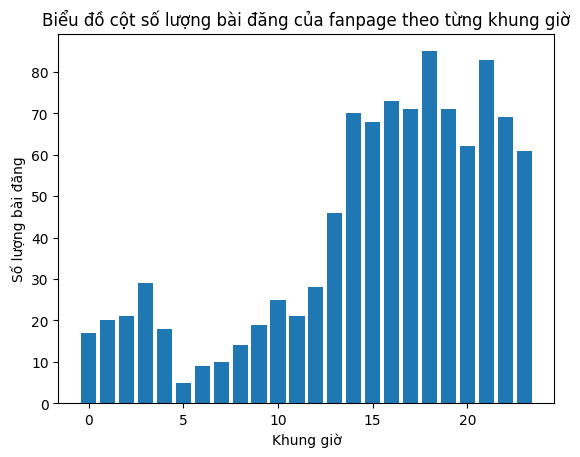

In [39]:
#vẽ biểu đồ cột số lượng bài đăng của fanpage theo từng khung giờ

# Tạo dữ liệu
x = df_hour.index # Khung giờ
y = df_hour["post_text"] # Số lượng bài đăng

# Vẽ biểu đồ cột
plt.bar(x, y)
plt.xlabel("Khung giờ")
plt.ylabel("Số lượng bài đăng")
plt.title("Biểu đồ cột số lượng bài đăng của fanpage theo từng khung giờ")
plt.show()


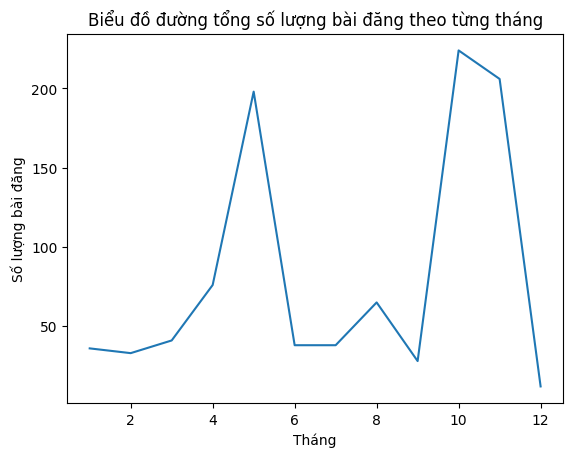

In [40]:
# vẽ biểu đồ đường tổng số lượng bài đăng theo từng tháng

# Tạo dữ liệu
x = df_monthly.index # Tháng
y = df_monthly["post_text"] # Số lượng bài đăng

# Vẽ biểu đồ đường
plt.plot(x, y)
plt.xlabel("Tháng")
plt.ylabel("Số lượng bài đăng")
plt.title("Biểu đồ đường tổng số lượng bài đăng theo từng tháng")
plt.show()


<Axes: title={'center': 'Số lượt tương tác trong các bài đăng theo thời gian'}, xlabel='Thời gian', ylabel='Số lượt tương tác'>

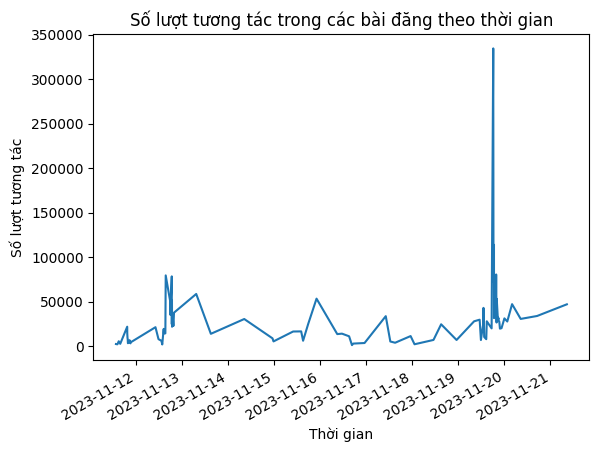

In [41]:
# vẽ biểu đồ đường cho cột "interaction" để biết lượng tác trong các bài đăng thay đổi như thế nào
df_clean.plot(x="time", y="interaction", title="Số lượt tương tác trong các bài đăng theo thời gian", 
              xlabel="Thời gian", ylabel="Số lượt tương tác", legend=False)

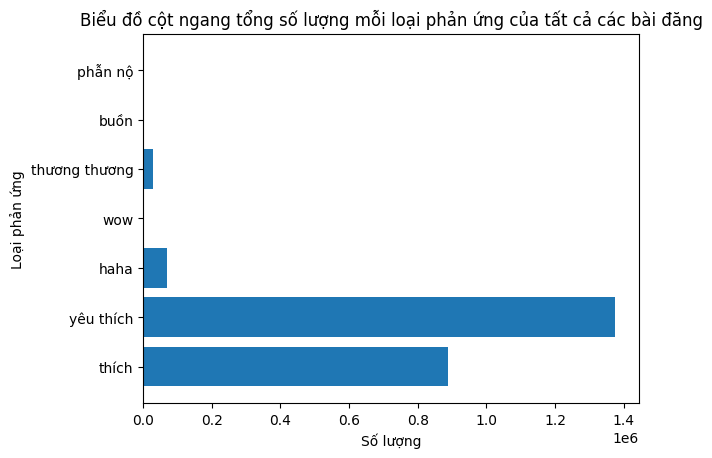

In [42]:
# vẽ biểu đồ tổng số lượng mỗi loại phản ứng của tất cả các bài đăng

# Tạo dữ liệu
x = list(reaction_dict.keys()) # Các loại phản ứng
y = list(reaction_dict.values()) # Số lượng mỗi loại phản ứng

# Vẽ biểu đồ cột ngang
plt.barh(x, y)
plt.ylabel("Loại phản ứng")
plt.xlabel("Số lượng")
plt.title("Biểu đồ cột ngang tổng số lượng mỗi loại phản ứng của tất cả các bài đăng")
plt.show()



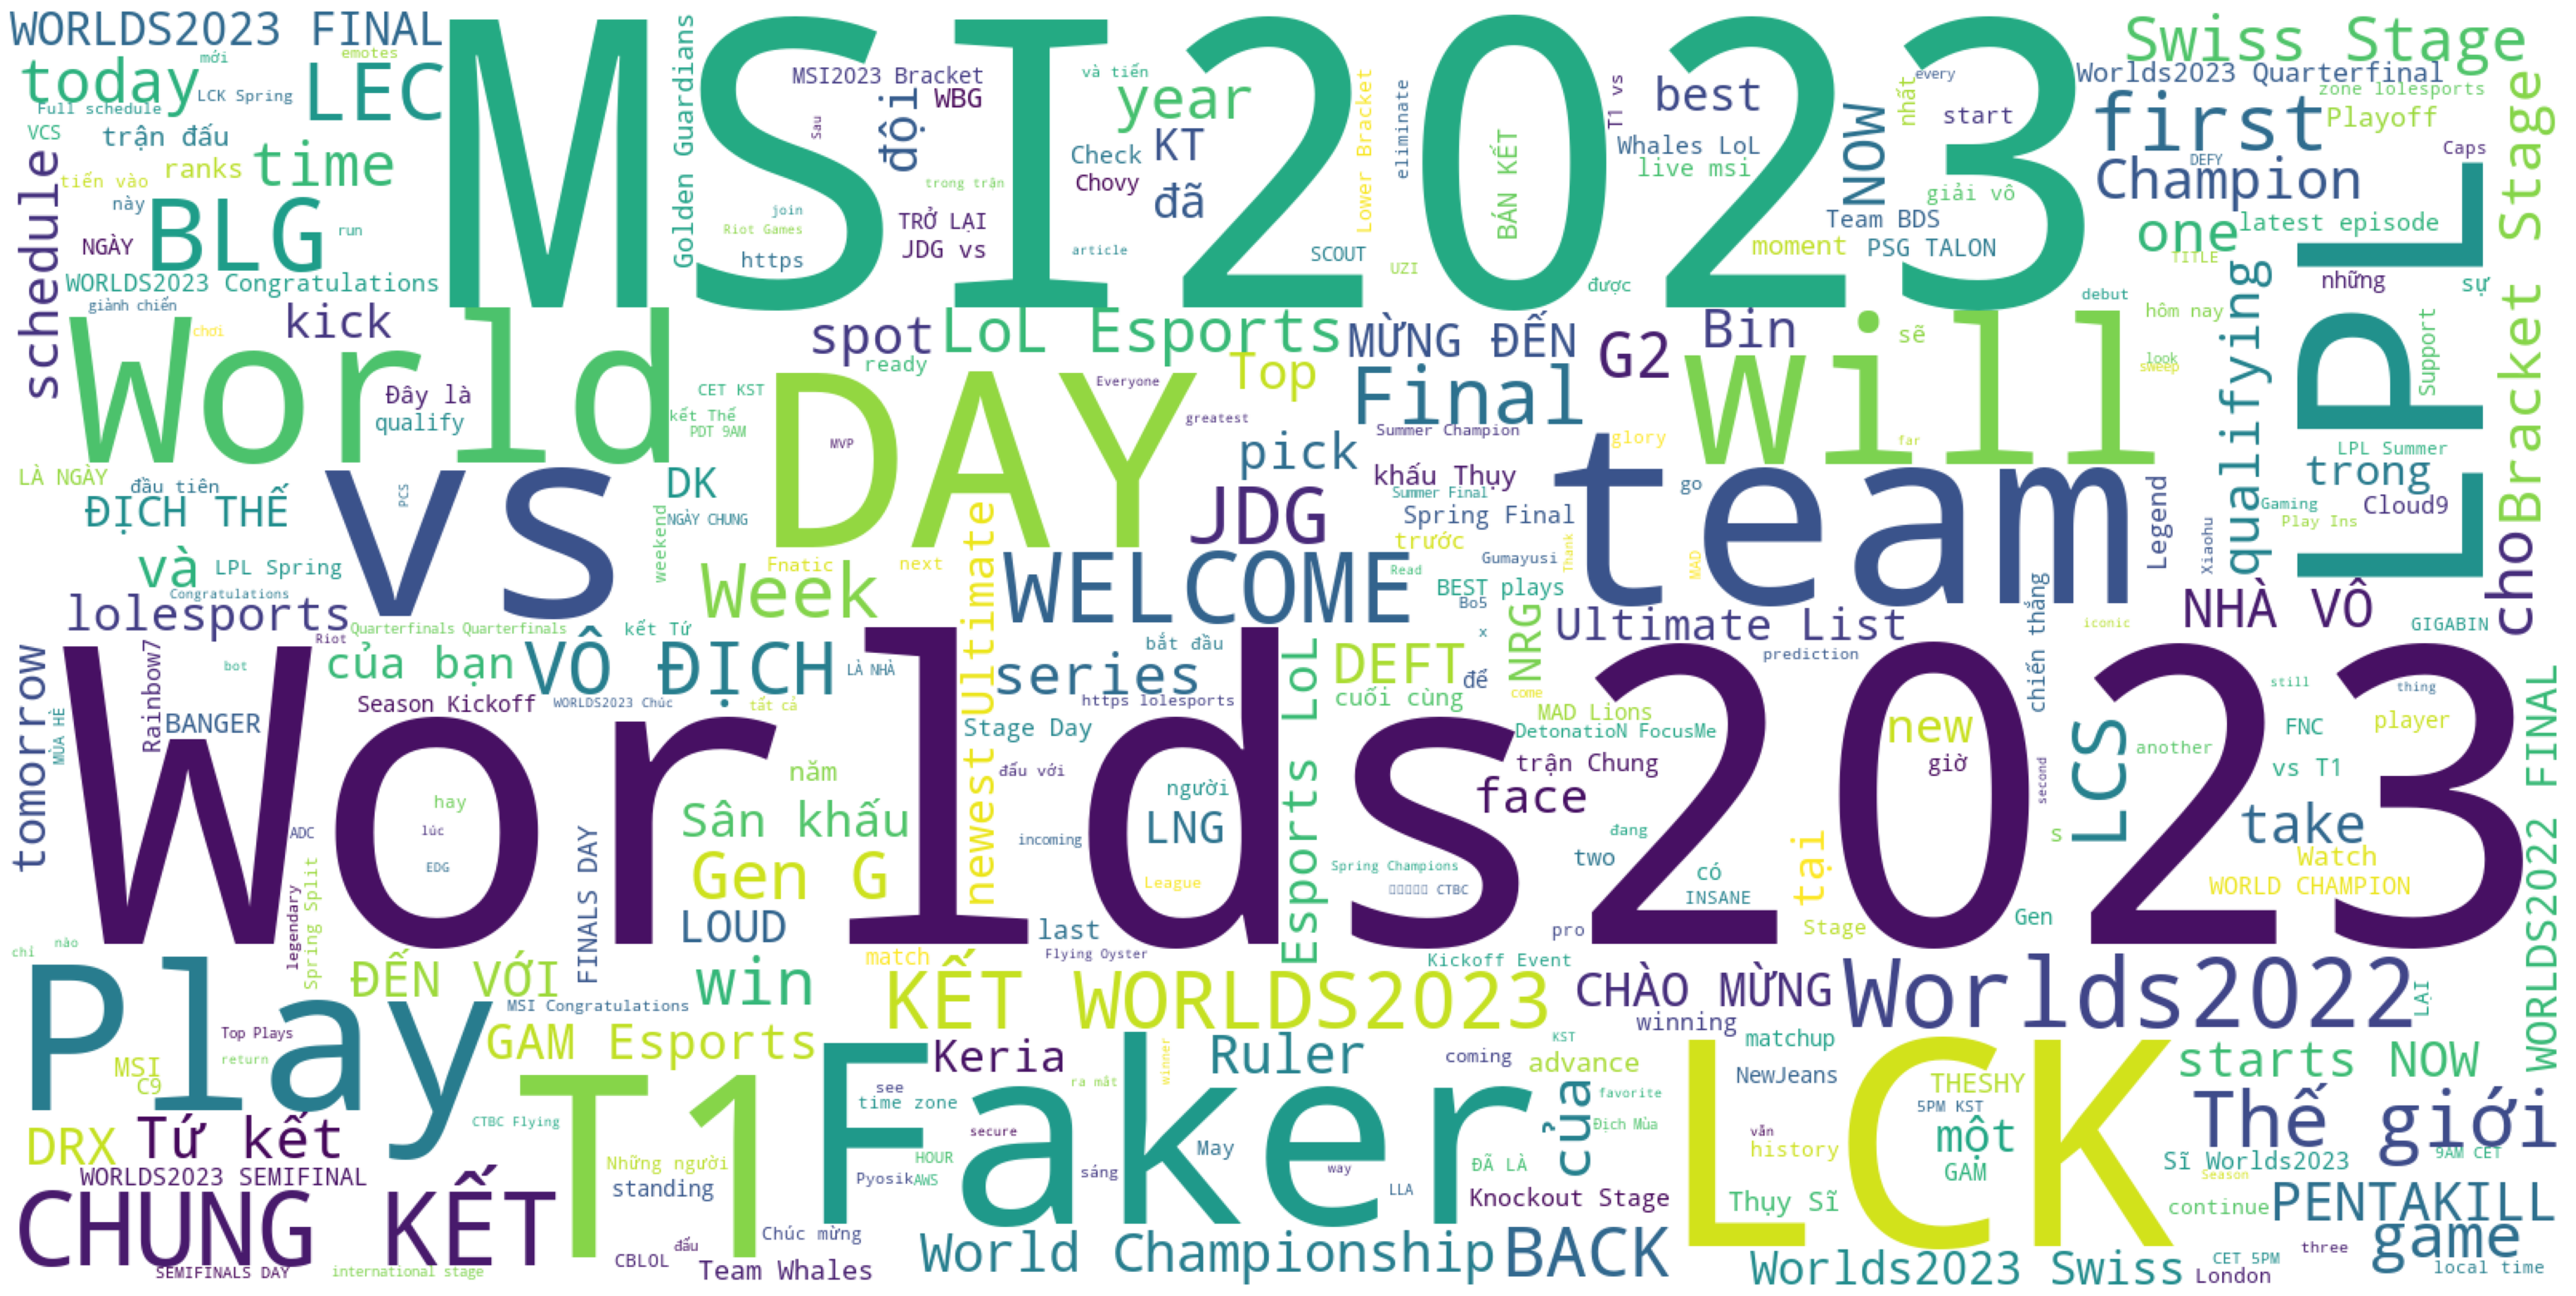

In [43]:
# tạo một biểu đồ từ để thể hiện tần suất xuất hiện của những từ khoá tiêu biểu trong bộ dữ liệu
from wordcloud import WordCloud, STOPWORDS
text = df_post_and_time["post_text"].str.cat(sep=" ")
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=1600, height=800
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

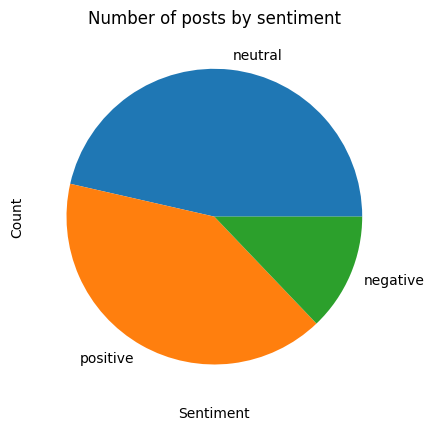

In [44]:
# Vẽ biểu đồ tròn thể hiện số lượng bài đăng theo cảm xúc
# Chia cảm xúc thành 3 nhóm: tích cực (polarity > 0.05), trung tính (polarity từ -0.05 đến 0.05), tiêu cực (polarity < -0.05)
df_sentiment["sentiment"] = df_sentiment["polarity"].apply(lambda x: "positive" if x > 0.05 else "neutral" if x >= -0.05 else "negative")
df_sentiment["sentiment"].value_counts().plot(kind="pie")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Number of posts by sentiment")
plt.show()

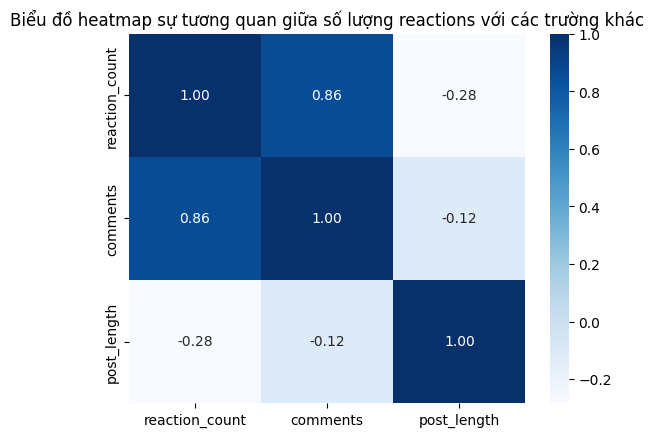

In [45]:
#  vẽ biểu đồ heatmap thể hiện sự tương quan giữa số lượng reactions với các trường khác

# Tạo dữ liệu
data = correlation # Bảng tương quan đã tính ở trên

# Vẽ biểu đồ heatmap
sns.heatmap(data, annot=True, fmt=".2f", cmap="Blues")
plt.title("Biểu đồ heatmap sự tương quan giữa số lượng reactions với các trường khác")
plt.show()
